In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [3]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [8]:
model = LogisticRegression()
logreg = LogReg()

In [13]:
X,y = make_classification (n_samples=1000,n_features=2, n_informative=2,n_redundant=0,n_classes=2,class_sep=2,random_state=1)
#оздание синтетических данных с помощью функции make_classification, где n_samples - количество образцов, n_features - количество признаков,
#n_informative - количество информативных признаков, n_redundant - количество избыточных признаков, n_classes - количество классов, class_sep -
#разделение классов, random_state - начальное значение для генерации случайных чисел. Полученные данные разделяются на матрицу признаков X и вектор
#целей y.
X,y

(array([[ 1.86341137,  0.08764555],
        [-1.53099717,  1.90118241],
        [-0.01722404, -2.59111159],
        ...,
        [ 2.33019532,  4.72180951],
        [-2.01084076,  1.42633933],
        [-2.00873243,  2.24540194]]),
 array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 

In [42]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


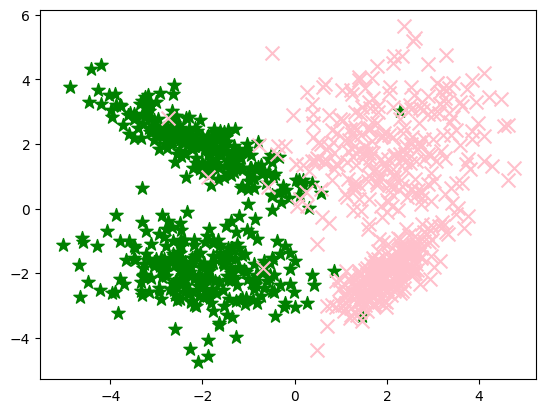

In [46]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="*", c='green', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='pink', s=100)
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#разделение данных на обучающую и тестовую выборки с помощью функции train_test_split, обучение модели на обучающих данных с помощью метода fit,
#предсказание значений на тестовых данных с помощью метода predict, и вывод метрик классификации с помощью функции classification_report.
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.97      0.98      0.98       105

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



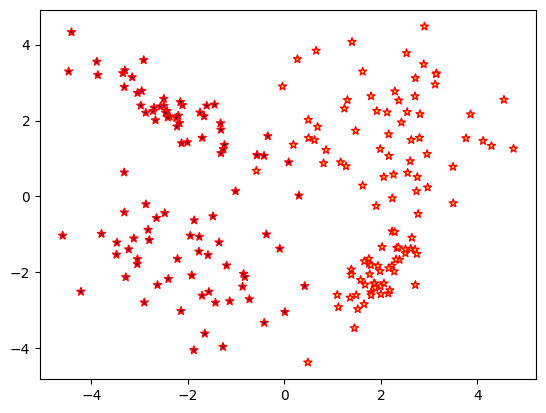

In [40]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='red', marker='*')
plt.show()

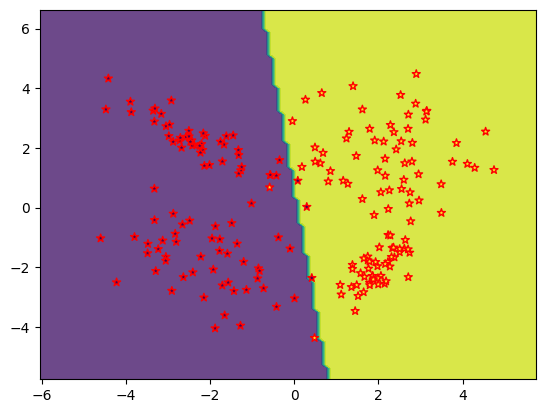

In [41]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='red', marker='*')
plt.show()

Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [47]:
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0]

In [48]:
losses = []
for alpha in alpha_values:
    model = LogReg(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = np.mean(y_pred == y)
    losses.append(1 - accuracy)

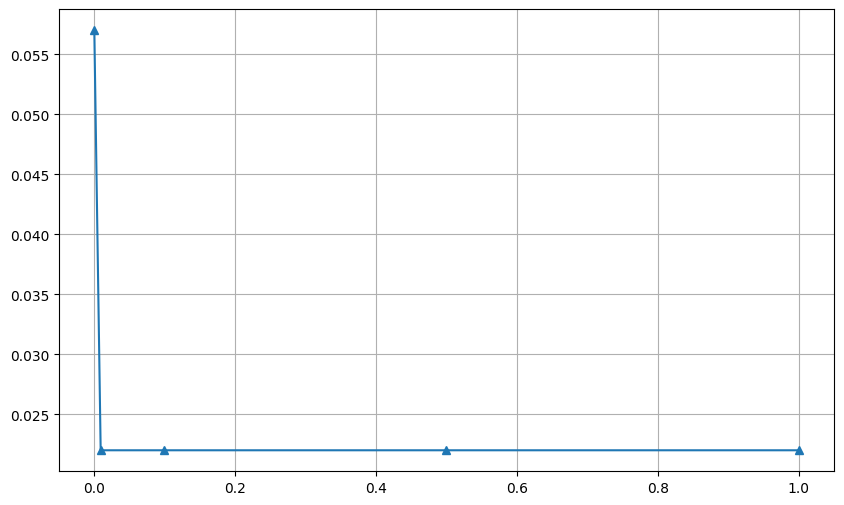

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, losses, marker='^')
plt.grid()
plt.show()

Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [53]:
class sgd:
    def __init__(self, n_iters=1000):
        self._n_iters = n_iters

    def grad_func(self, X, y, b):
        y_diff = y - self.predict(X, b)
        return -2 * np.dot(X.T, y_diff) / X.shape[0]

    def predict(self, X, b):
        return np.dot(X, b)

    def add_dummy_column(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def fit(self, X, y):
        X = self.add_dummy_column(X)
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

<ipython-input-59-edb5da2c20be>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c='b', cmap=plt.cm.Paired)


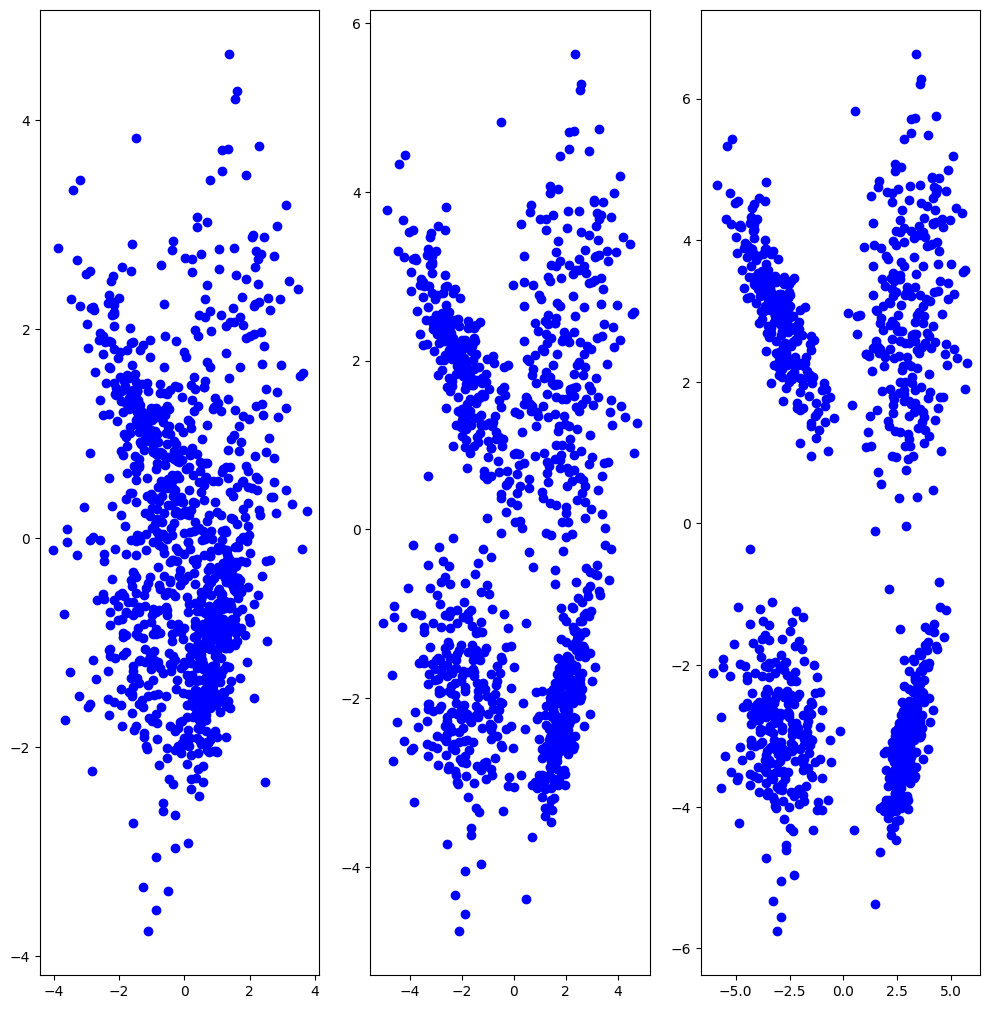

In [59]:
class_sep_values = [1.0, 2.0, 3.0]
plt.figure(figsize=(10, 20))
for i, class_sep in enumerate(class_sep_values):
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, class_sep=class_sep, random_state=1)
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c='b', cmap=plt.cm.Paired)
plt.tight_layout()
plt.show()

чем выше class_sep тем выше точность

Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [62]:
X, y = make_classification(n_samples=1000, n_features=100, n_informative=50, n_redundant=25, n_classes=2, random_state=1)
print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogReg(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('\n',accuracy)

[[-2.93856318e-02 -8.72806541e-01  2.67974453e-01 ... -2.07705891e+00
   4.57301998e+00  3.97416927e+01]
 [ 2.49582430e-01  4.56916317e-01  1.08724470e-01 ...  5.35342914e+00
   1.72650359e+00  8.32274276e+00]
 [ 1.05489743e+00  7.36976211e+00 -9.56339084e-01 ... -1.25712027e+00
  -2.84842684e+01  3.54423843e+01]
 ...
 [ 8.45233086e-01  4.31610246e+00  1.09205653e+00 ... -4.14122848e+00
   4.01537744e+01 -2.71891563e+01]
 [-7.64402585e-01  9.95480904e+00  5.40328482e-02 ...  1.89986337e+00
   3.66496580e+01  1.74358978e+01]
 [ 2.78648014e-01  5.87618596e+00 -1.47314507e+00 ...  2.29618091e+00
   3.42352150e+00  6.59663426e+00]] [1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1

Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [64]:
probabilities = model.predict_proba(X_test)
np.set_printoptions(precision=2, suppress=True)
probabilities

array([0.89, 0.  , 0.  , 0.99, 0.  , 0.  , 1.  , 0.24, 0.17, 0.67, 0.95,
       0.63, 0.  , 0.04, 1.  , 0.03, 0.81, 0.02, 0.  , 0.12, 0.36, 0.63,
       1.  , 0.72, 0.04, 0.14, 0.27, 0.99, 0.04, 1.  , 0.31, 1.  , 1.  ,
       0.96, 1.  , 0.95, 1.  , 0.  , 0.96, 0.24, 0.  , 1.  , 1.  , 0.02,
       0.6 , 0.  , 0.82, 1.  , 1.  , 0.  , 0.3 , 0.02, 0.97, 0.96, 0.  ,
       0.  , 0.77, 0.  , 0.02, 0.  , 0.  , 0.98, 0.  , 0.88, 1.  , 1.  ,
       0.65, 1.  , 0.95, 0.99, 1.  , 1.  , 0.99, 0.99, 0.  , 0.95, 1.  ,
       0.68, 0.  , 0.  , 0.59, 1.  , 0.97, 1.  , 0.03, 1.  , 0.  , 0.62,
       0.98, 0.66, 0.  , 1.  , 0.03, 1.  , 1.  , 0.65, 1.  , 0.01, 0.  ,
       0.  , 0.01, 0.29, 0.04, 0.04, 0.  , 1.  , 0.98, 0.26, 1.  , 1.  ,
       1.  , 0.98, 0.93, 1.  , 0.73, 0.  , 0.  , 0.  , 0.  , 0.13, 0.  ,
       0.93, 0.  , 0.04, 0.76, 0.82, 0.04, 1.  , 0.  , 0.05, 0.75, 0.47,
       1.  , 1.  , 1.  , 0.99, 0.  , 0.3 , 0.01, 0.01, 0.  , 0.37, 0.55,
       0.  , 1.  , 0.  , 0.  , 0.87, 1.  , 1.  , 0.